In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 1: Import the necessary libraries
import numpy as np
import os
from PIL import Image
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Load the data
train_data = []
train_labels = []
test_data = []
test_labels = []
val_data = []
val_labels = []

# Load data from train folder
for i in range(5):
    folder_name = f"/content/drive/MyDrive/rawdata/Train/Phase{i+1}"
    for filename in os.listdir(folder_name):
        img = Image.open(os.path.join(folder_name, filename))
        img = img.resize((299, 299))
        img_array = np.array(img)
        train_data.append(img_array)
        train_labels.append(i)

# Load data from test folder
for i in range(5):
    folder_name = f"/content/drive/MyDrive/rawdata/Test/Phase{i+1}"
    for filename in os.listdir(folder_name):
        img = Image.open(os.path.join(folder_name, filename))
        img = img.resize((299, 299))
        img_array = np.array(img)
        test_data.append(img_array)
        test_labels.append(i)

# Load data from validation folder
for i in range(5):
    folder_name = f"/content/drive/MyDrive/rawdata/Validation/Phase{i+1}"
    for filename in os.listdir(folder_name):
        img = Image.open(os.path.join(folder_name, filename))
        img = img.resize((299, 299))
        img_array = np.array(img)
        val_data.append(img_array)
        val_labels.append(i)

In [ ]:
# Step 3: Preprocess the data
train_data = np.array(train_data)
train_labels = np.array(train_labels)
train_data = keras.applications.inception_v3.preprocess_input(train_data)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_data = keras.applications.inception_v3.preprocess_input(test_data)

val_data = np.array(val_data)
val_labels = np.array(val_labels)
val_data = keras.applications.inception_v3.preprocess_input(val_data)


In [ ]:
# Step 4: Load the pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
# Step 5: Build the model
model = keras.Sequential(
    [
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation="relu"),
        layers.Dense(5, activation="softmax"),
    ]
)

In [ ]:
# Step 6: Compile the model
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [ ]:
# Step 7: Train the model
model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(val_data, val_labels))

Epoch 1/50
26/26 [==============================] - 51s 542ms/step - loss: 0.5980 - accuracy: 0.8190 - val_loss: 3.9256 - val_accuracy: 0.2996
Epoch 2/50
26/26 [==============================] - 11s 431ms/step - loss: 0.2811 - accuracy: 0.8901 - val_loss: 2.0356 - val_accuracy: 0.4944
Epoch 3/50
26/26 [==============================] - 11s 436ms/step - loss: 0.2526 - accuracy: 0.9076 - val_loss: 2.7113 - val_accuracy: 0.4532
Epoch 4/50
26/26 [==============================] - 12s 450ms/step - loss: 0.2149 - accuracy: 0.9164 - val_loss: 4.5073 - val_accuracy: 0.2322
Epoch 5/50
26/26 [==============================] - 11s 442ms/step - loss: 0.1822 - accuracy: 0.9338 - val_loss: 7.3850 - val_accuracy: 0.1648
Epoch 6/50
26/26 [==============================] - 12s 453ms/step - loss: 0.2361 - accuracy: 0.9201 - val_loss: 2.2164 - val_accuracy: 0.5431
Epoch 7/50
26/26 [==============================] - 12s 455ms/step - loss: 0.1556 - accuracy: 0.9451 - val_loss: 2.2153 - val_accuracy: 0.4831

In [ ]:
# Step 8: Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Test accuracy: {test_acc}")


9/9 [==============================] - 1s 112ms/step - loss: 2.5652 - accuracy: 0.6654
Test accuracy: 0.6654135584831238


In [ ]:
# Step 9: Make predictions
predictions = model.predict(test_data)

9/9 [==============================] - 4s 129ms/step


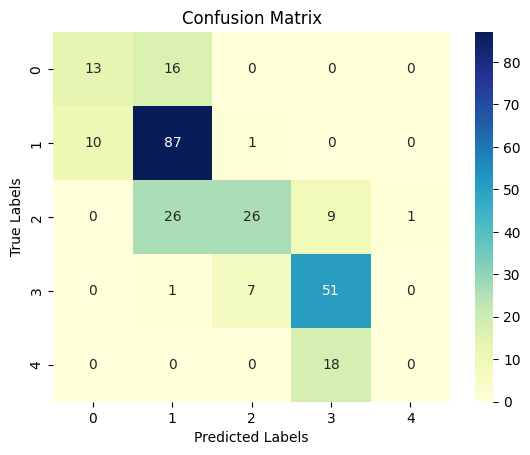

In [ ]:
# Step 10: Calculate confusion matrix
# create the confusion matrix
conf_matrix = confusion_matrix(test_labels, np.argmax(predictions, axis=1))

# plot the heatmap
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()